# Le f-stringhe

L'istruzione `print` standard non consente di formattare l'output in maniera molto raffinata. Ad esempio, se la variabile `x` contiene un prezzo in euro, vorremmo stamparlo usando sempre due cifre dopo la virgola.

In [1]:
x = 2.10
print(x)  # vorremmo stampare 2.10, ma in realtà stampa 2.1

2.1


Se abbiamo molti numeri da stampare uno dopo l'altro, vorremmo essere in grado di allinearli tutti verso destra. Ad esempio, ci piacerebbe che
```python
print(355)
print(1)
print(-45)
```
stampasse i numeri in questo modo:
```text
355
  1
 -4
```
ed invece stampa
```text
355
1
-4
```
perché allinea tutto a sinistra.

In [2]:
print(355)
print(1)
print(-4)

355
1
-4


Esiste vari modi in Python per formattare l'output in maniera corretta. Il vostro libro vi spiega un metodo un po' obsoleto basato nella Sezione 2.5.3. Qui vi spiego invece l'uso delle f-stringhe.

Una *f-stringa* è una stringa che inizia con una lettera `f` fuori dalle virgolette (f sta per formatted)

In [ ]:
f"Ciao sono una f-stringa"

'Ciao sono una f-stringa'

All'apparenza la `f` davanti sembra inutile, ma se le f-stringhe contengono una espressione tra parentesi graffa, questa espressione viene calcolata e il risultato sostituito nella stringa risultante.

In [3]:
x = 2
y = 4.5
f"Ecco il numero {x+2} e {y-4}"

'Ecco il numero 4 e 0.5'

Notare che nelle stringhe normali tutto ciò non succede.

In [4]:
"Ecco il numero {x+2} e {y-4}"

'Ecco il numero {x+2} e {y-4}'

Ecco altri esempi:

In [5]:
f"Ciao {abs(5-6)}"

'Ciao 1'

In [6]:
nome="Michele"
f"Ciao {nome}"

'Ciao Michele'

Quindi le f-stringhe sono un metodo per inserire espressioni (tipicamente nomi di variabili) all'interno di una stringa. La cosa interessante per i nostri scopi è che, sempre dentro le graffe, è possibile specificare come formattare il risultato dell'espressione prima di inserirla nella stringa. Per far ciò, dopo l'espressione, si inserisce il carattere di due punti `:` e poi si specifica il formato con un [apposito mini-linguaggio](https://docs.python.org/3/library/string.html#format-specification-mini-language).

La cosa più semplice che si può fare è, dopo i due punti, inserire un numero intero. Questo è il numero di caratteri che l'espressione occuperà nella stringa. Nell'esempio che segue, la variabile `x` viene rimpiazzata col suo valore che è 2, ma a questo 2 vengono aggiunti altri 9 spazi in modo da occupare comunque il numero di caratteri specificato, che è 10.

Ad esempio:

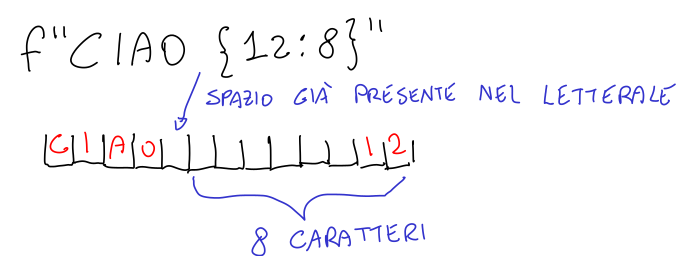

In [7]:
f"Ecco il numero {x:10} che occupa 10 spazi ed è allineato a destra"

'Ecco il numero          2 che occupa 10 spazi ed è allineato a destra'

Si noti che il numero, all'interno dello spazio di 10 caratteri che gli è stato dedicato, è stato allineato a destra. Le stringhe, invece, vengono allineate a sinistra.

In [8]:
f"Mi chiamo {nome:20}, ciao"

'Mi chiamo Michele             , ciao'

Per i `float`,è possibile anche specificare il numero di caratteri che vogliamo dopo la virgola, come nel seguente esempio.

In [9]:
f"Ecco il numero {y:10.2f} che occupa 10 spazi, di cui 2 per le cifre decimali"

'Ecco il numero       4.50 che occupa 10 spazi, di cui 2 per le cifre decimali'

Si può anche specificare solo la precisione senza lo spazio che il numero deve occupare.

In [10]:
f"Ecco il numero {y:.2f} con 2 cifre decimali"

'Ecco il numero 4.50 con 2 cifre decimali'

Infine, si possono allineare a sinistra anche i numeri mettendo il simbolo `<` prima della lunghezza del campo.

In [ ]:
f"Ecco il numero {y:<10.2f} come sopra ma allineato a sinistra"

'Ecco il numero 4.50       come sopra ma allineato a sinistra'

L'elenco di tutto ciò che è possibile specificare dopo i due punti è molto lungo, e vi rimando alla documentazione sul [mini-linguaggio per la specifica della formattazione](https://docs.python.org/3/library/string.html#formatspec).

## f-stringhe e tabulazioni (approfondimento)

Questa parte finale del notebook è dedicata a chi sa cosa sono i caratteri di tabulazione, gli altri possono completamente ignorarne il contenuto. Ci vogliamo porre una domanda: invece di usare le f-stringhe, è possibile utilizzare il carattere tabulazione per ottenere lo stesso risultato?

La risposta secca a questa domanda è no, ma ne approfitto per spiegare cosa è il carattere tabulazione e perché non è adatto a risolvere i problemi di formattazione del testo.

Il carattere di tabulazione (da ora in poi chiamato semplicemente HT per *horizontal tabulation*) ha codice ASCII 9, e può essere inserito in una stringa Python con il codice di escape `\t`. Quando il carattere HT viene inviato in stampa, il suo effetto è spostare il cursore avanti fino al *tab stop* successivo. La posizione di questi tab stop dipendono dal sistema operativo, ma in generale si trovano in tutte le colonne multiple di 8. Pertanto, il comando
```python
print("aa\tbb")
```
stamparà due `a`, poi 6 spazi in modo da raggiungere la colonna numero 8, quindi due `b`.

Invece 
```python
print("aaaa\tbb")
```
Invece stamparà quattro `a`, poi 4 spazi in modo da raggiungere la colonna numero 8, quindi due `b`.

Vediamo un esempio un po' più complesso:

In [11]:
print("\t",1,"\tb")
print("a\t",10,"\tb")
print("aa\t",20,"\tb")
print("aa      ",300,"\tb")

	 1 	b
a	 10 	b
aa	 20 	b
aa       300 	b


Come si vede nell'esempio di sopra, abbiamo usato la tabulazione per allineare tutti i numeri e le lettere `b`. Tuttavia, l'uso delle tabulazioni ha enormi limitazioni:
  * non consente di specificare quanto spazio riservare per le varie informazioni, i tab stop sono in posizione fissa;
  * non consente di allineare i valori a destra: i numeri 1, 10, 20, etc.. sono tutti stati allineati a sinistra;
  * si richia l'incompatibilità tra sistemi che usano posizioni differenti per i tab stop.

Per questi motivi, è meglio non usare il carattere tabulazione. Si tratta più che altro di un retaggio delle vecchie macchine da scrivere.

Diverso è il discorso per le tabulazioni nei word-processor, come LibreOffice Writer o Microsoft Word. Qui le tabulazioni sono molto più sofisticate: è possibile configurare la posizione dei tab stop, decidere che tipo di allineamento usare per ognuno di essi, etc... Ma nessuna di queste funzionalità è presente quando si usa il carattere di tabulazione in Python.